In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
from glob import glob
import os
import json 
import torch
from torch import nn
from torchvision import models
from torch.utils.data import Dataset
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [3]:
sample = glob('/content/drive/MyDrive/data/train/*')[42]

sample_csv = pd.read_csv(glob(sample+'/*.csv')[0])
sample_image = cv2.imread(glob(sample+'/*.jpg')[0])
sample_json = json.load(open(glob(sample+'/*.json')[0], 'r'))

In [4]:
sample_csv

,측정시각,내부 온도 1 평균,내부 온도 1 최고,내부 온도 1 최저,내부 온도 2 평균,내부 온도 2 최고,내부 온도 2 최저,내부 온도 3 평균,내부 온도 3 최고,내부 온도 3 최저,...,배지 중량 최저,양액 온도 평균,양액 온도 최고,양액 온도 최저,외부 풍향 수치,외부 풍향,외부 빗물 시간,외부 누적일사 평균,양액 급액 누적,양액 배액 누적
0,2021-10-05 08:30:00,28.0,28.7,27.6,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1,2021-10-05 08:20:00,26.7,27.4,26.2,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
2,2021-10-05 08:10:00,25.3,26.0,24.2,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
3,2021-10-05 08:00:00,23.4,24.2,22.6,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4,2021-10-05 07:50:00,22.2,22.5,21.9,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,2021-10-04 09:50:00,26.0,26.5,25.5,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
137,2021-10-04 09:40:00,25.0,25.2,24.8,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
138,2021-10-04 09:30:00,24.6,24.8,24.4,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
139,2021-10-04 09:20:00,24.2,24.4,24.1,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


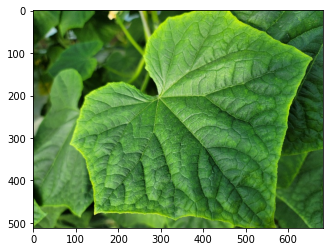

In [5]:
# image
plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
# json
sample_json

{'annotations': {'area': 3,
  'bbox': [{'h': 511.53495833333335,
    'w': 572.919125,
    'x': 87.42598958333333,
    'y': 0.0}],
  'crop': 4,
  'disease': '00',
  'grow': 13,
  'part': [],
  'risk': 0},
 'description': {'date': '20211005',
  'height': 512,
  'image': '51807.jpg',
  'region': 0,
  'task': 0,
  'time': '0839',
  'width': 682}}

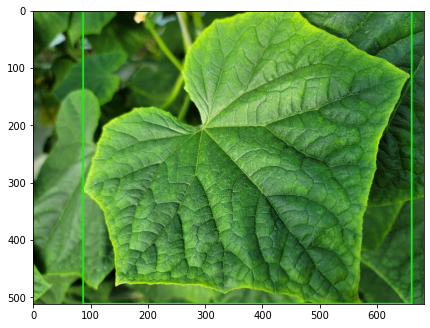

In [7]:
# visualize bbox
plt.figure(figsize=(7,7))
points = sample_json['annotations']['bbox'][0]
part_points = sample_json['annotations']['part']
img = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

cv2.rectangle(
    img,
    (int(points['x']), int(points['y'])),
    (int((points['x']+points['w'])), int((points['y']+points['h']))),
    (0, 255, 0),
    2
)
for part_point in part_points:
    point = part_point
    cv2.rectangle(
        img,
        (int(point['x']), int(point['y'])),
        (int((point['x']+point['w'])), int((point['y']+point['h']))),
        (255, 0, 0),
        1
    )
plt.imshow(img)
plt.show()